In [1]:
# Importando as bibliotecas necessárias.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Função mágica do Jupyter usada para plotar figuras interativas.
%matplotlib notebook

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

### Gerando a função observável.

A **função objetivo** é dada por

$$y = x_1 + x_2,$$

onde $a_1$ e $a_2$ são iguais a $1$. 

**OBS**.: Percebam que a função objetivo é um **plano** (i.e., superfície em 2D).

A **função observável** (versão ruidosa da função objetivo, $y$) é dada por

$$y_{noisy} = y + w,$$

onde $w$ é o ruído adicionado às amostras da função objetivo.

In [3]:
# Número de exemplos.
N = 1000

# Atributos.
x1 = 2*np.random.rand(N, 1) - 1
x2 = 2*np.random.rand(N, 1) - 1

# Ruído Gaussiano normal padrão.
w = np.random.randn(N, 1)

# Função objetivo (equação de um plano).
y = x1 + x2

# Função observável (versão ruidosa de y)
y_noisy = y + w

### Comparando a função observável com a objetivo.

Por termos dois atributos ($x_1$ e $x_2$) mais o rótulo ($y$), esta figura terá três dimensões.

**OBS**.: Se tivéssemos mais de dois atributos, já não seria possível plotar uma figura.

<IPython.core.display.Javascript object>


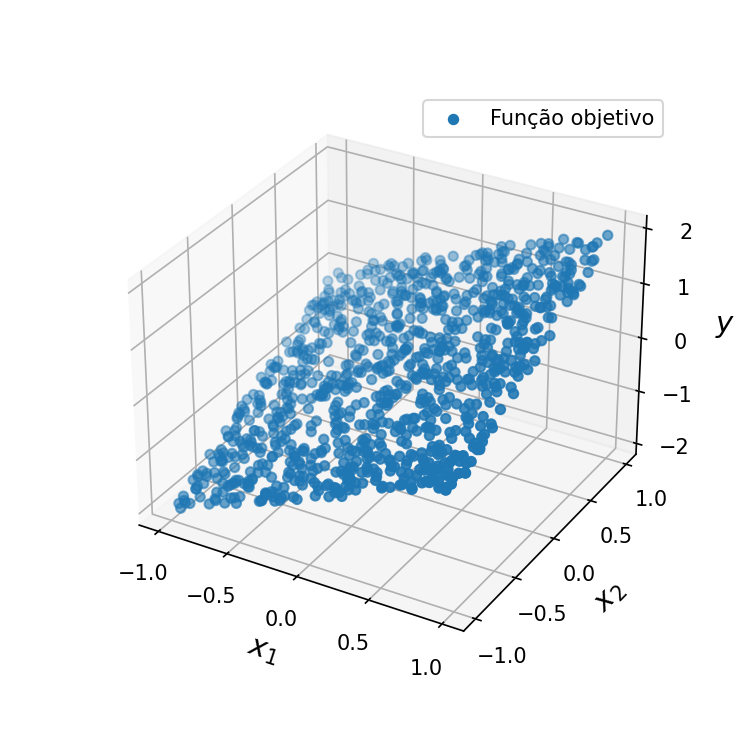

In [9]:
# Plot observable function.
fig = plt.figure(figsize=(5,5))
plt.subplot(projection='3d')
ax = fig.gca()
ax.scatter(x1, x2, y, label='Função objetivo')
#ax.scatter(x1, x2, y_noisy, label='Função observável (versão ruidosa)')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-2, -1, 0, 1, 2])
plt.legend()
plt.savefig("observable_function2.png", dpi=1200)
plt.show()

### Encontrando a solução ótima com a equação normal.

Nós vamos encontrar a solução ótima para plotá-la com a superfície de erro e vermos que ela realmente nos dá o ponto de menor erro possível.

A função hipótese utilizada neste exemplo é dada por

$$h(\textbf{x},n) = \hat{y}(n) = \hat{a}_1 x_1(n) + \hat{a}_2 x_2(n),$$

a qual pode ser re-escrita em **formato matricial** como

$$ \hat{\textbf{y}} = X\hat{\textbf{a}},$$

onde $X$ é a matriz de atributos com dimensão, neste exemplo, $N \times K$ e $\hat{\textbf{a}}$ é o vetor de pesos, com dimensão $K \times 1$.

**OBS**.: percebam que não temos o **peso de bias**, $\hat{a}_0$, pois a função objetivo não o tem também.

In [5]:
# Concatenando os 2 vetores de atributos para criar a matriz de atributos com dimensão N x K.
X = np.c_[x1, x2]

# Equação normal.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Imprimindo os valores encontrados para os pesos, a1 e a2.
print('peso a1:', a_opt[0, 0])
print('peso a2:', a_opt[1, 0])

# Realizando a predição com a função hipótese: yhat = a1*x1 + a2*x2.
# Perceba que a função hipótese está em sua forma matricial.
yhat = X.dot(a_opt)

# Calculando o erro quadrático médio.
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Imprimindo o valor do erro.
print('Erro:', Joptimum)

peso a1: 1.0562259532139515
peso a2: 1.0787291149894196
Erro: 0.9669864585231435


### Definição da função que calcula os pontos para plotarmos a superfície de erro.

+ O erro é calculado variando-se $\hat{a}_1$ e $\hat{a}_2$ na equação do erro quadrático médio (EQM).
+ Essa variação é feita com as funções `linspace` e `meshgrid` da biblioteca **numpy**.
+ A função `linspace` cria uma sequência de valores linearmente espaçados dentro do intervalo definido.
+ A função `meshgrid` cria uma **malha** de valores que combina os valores de $\hat{a}_1$ e $\hat{a}_2$:

```python
a1 = np.linspace(0,4,5)
a2 = np.linspace(0,4,5)

A1, A2 = np.meshgrid(a1, a2)

A1 =  0 1 2 3 4        A2 =  0 0 0 0 0
      0 1 2 3 4              1 1 1 1 1
      0 1 2 3 4              2 2 2 2 2
      0 1 2 3 4              3 3 3 3 3
      0 1 2 3 4              4 4 4 4 4
        
plt.plot(A1, A2, marker='o', color='k')
```

<img src="../../figures/meshgrid.png" width="400px">

In [6]:
def calculateErrorSurface(x1, x2, y):
    """Generate data points for plotting the error surface."""
    
    # Retrieve number of examples.
    N = len(y)
    
    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-2.0, 4.0, M)
    a2 = np.linspace(-2.0, 4.0, M)

    # Generate matrices with combinations between a1 and a2 values.
    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            # Calculate the mean squared error (MSE) for each pair of values.
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))           
            
    return J, A1, A2

### Plotando a superfície de erro.

+ A superfície de erro é representada por uma **figura em três dimensões**, onde cada par de valores $\hat{a}_1$ e $\hat{a}_2$ corresponde a um erro, $J_e(a_1, a_2)$.
+ Observem que a superfície de erro é **convexa** e, consequentemente, temos apenas um ponto de mínimo, chamado de **mínimo global**.

**OBS**.: O ponto ótimo, encontrado com a equação normal, também é plotado na figura abaixo.

<IPython.core.display.Javascript object>


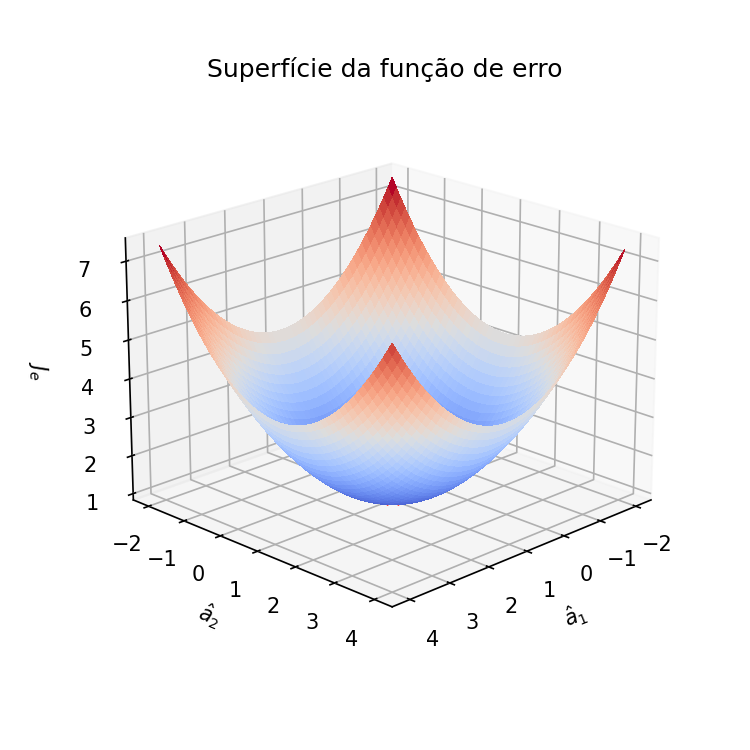

In [7]:
# Invocando a função que calcula os pontos para plotarmos a superfície de erro.
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot([a_opt[0, 0]], [a_opt[1, 0]], [Joptimum], c='r', marker='*', markersize=10)
ax.set_xlabel('$\hat{a}_1$')
ax.set_ylabel('$\hat{a}_2$')
ax.set_zlabel('$J_e$')
plt.title('Superfície da função de erro')
ax.view_init(20, 45)
#plt.savefig("error_surface_example2.png", dpi=600)
#Show the plot.
plt.show()

### Plotando a superfície de contorno.

+ Outra figura importante que podemos plotar a partir dos resultados obtidos para plotarmos a superfície de erro é chamada de **superfície de contorno**.
+ Equivale a olhar a superfície de erro por cima e traçar planos onde o erro é constante.

<img src="../../figures/superficie_de_contorno.png" width="200px">

+ Uma linha de contorno é uma curva ao longo da qual uma função tem um **valor constante**.
    + No nosso caso, cada um dos círculos indica pontos na superfície de erro que têm o mesmo erro (**constante**).
    + Ou seja, qualquer par de valores $\hat{a}_1$ e $\hat{a}_2$ ao longo de uma curva terá o mesmo valor de erro.

+ Vejam que o raio dos círculos diminui conforme nos aproximamos do ponto de mínimo (estrela vermelha), isto indica que o erro esta diminuindo.

<IPython.core.display.Javascript object>


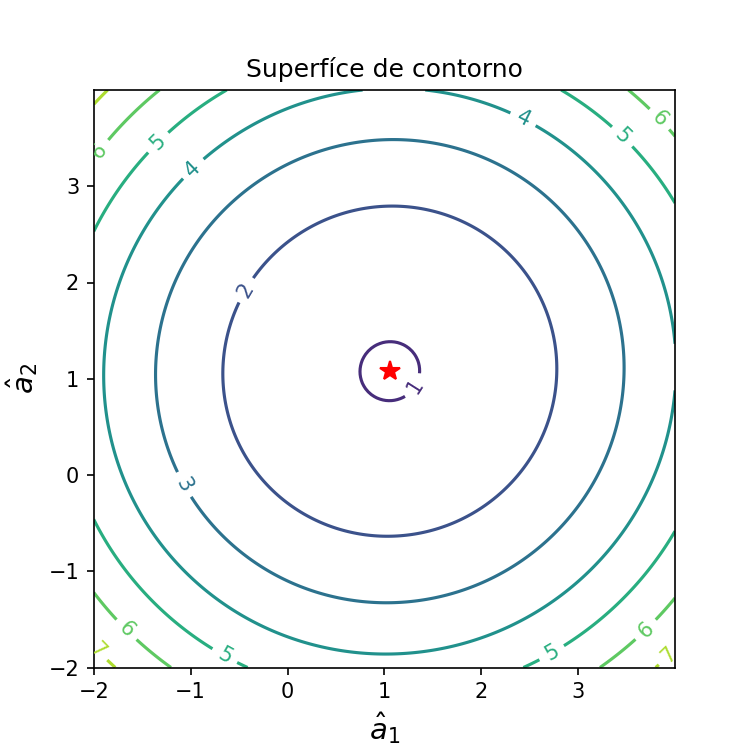

In [8]:
fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
# Add the point found with the normal equation.
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=10)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$\hat{a}_1$', fontsize=14)
plt.ylabel('$\hat{a}_2$', fontsize=14)
plt.title('Superfíce de contorno')
plt.xticks(np.arange(-2, 4, step=1.0))
plt.yticks(np.arange(-2, 4, step=1.0))
#plt.savefig("contour_surface_example2.png", dpi=600)
plt.show()

### Plotando a função observável juntamente com o hiperplano encontrado com a equação normal e a função objetivo.

<IPython.core.display.Javascript object>


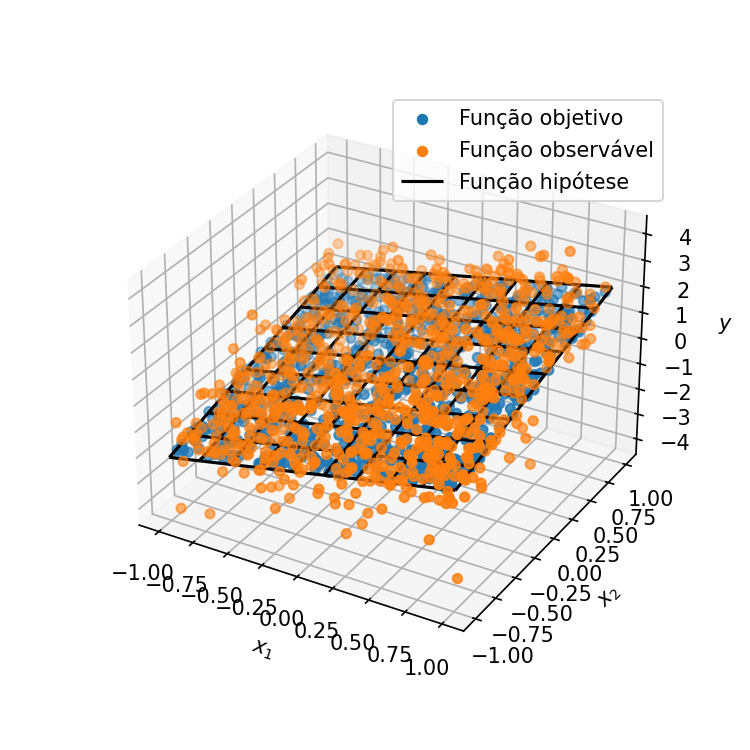

In [9]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
plt.subplot(projection='3d')
ax = fig.gca()

M = 10
x1_ = np.linspace(-1.0, 1.0, M)
x2_ = np.linspace(-1.0, 1.0, M)
X1, X2 = np.meshgrid(x1_, x2_)
Y = a_opt[0]*X1 + a_opt[1]*X2

ax.scatter(x1, x2, y, label='Função objetivo')
ax.scatter(x1, x2, y_noisy, label='Função observável')
ax.plot_wireframe(X1, X2, Y, color="black", label='Função hipótese')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show()